In [1]:
import os
os.listdir()

['.ipynb_checkpoints',
 'eda-logistic-regression-decision-tree.ipynb',
 'Untitled.ipynb',
 'wine.ipynb',
 'winequality-red.csv']

In [2]:
import pandas as pd

df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [5]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

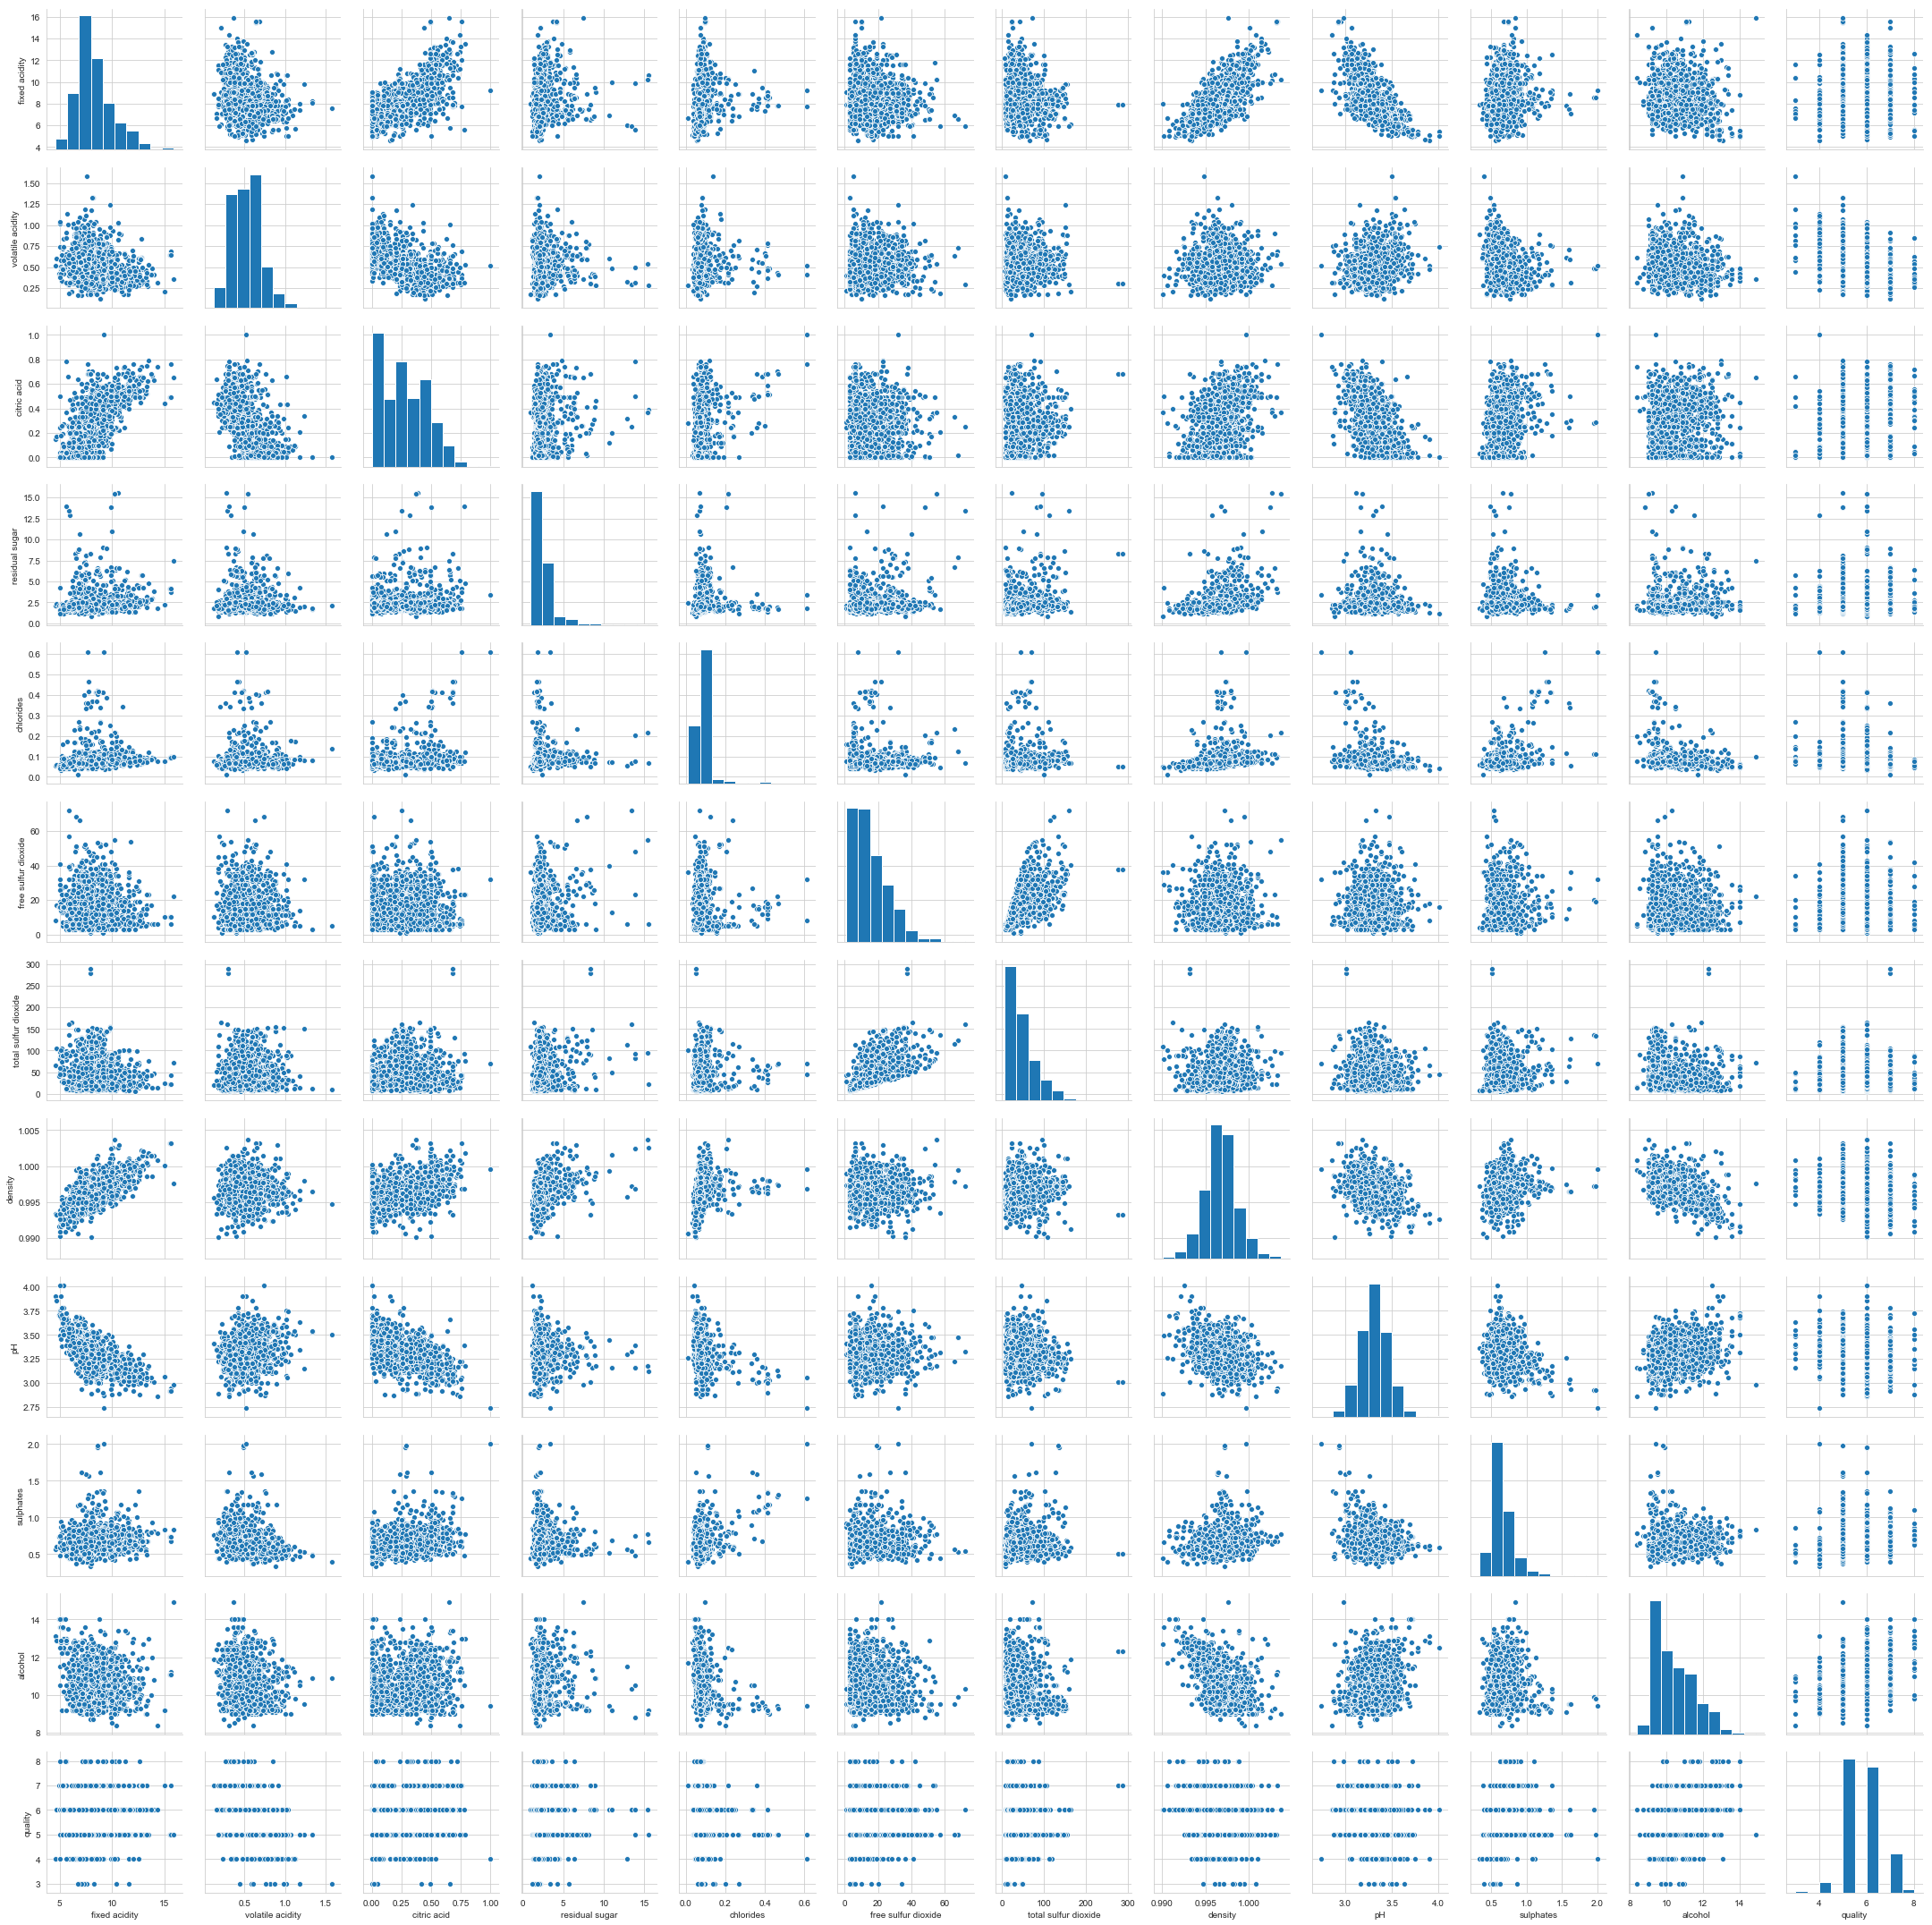

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)

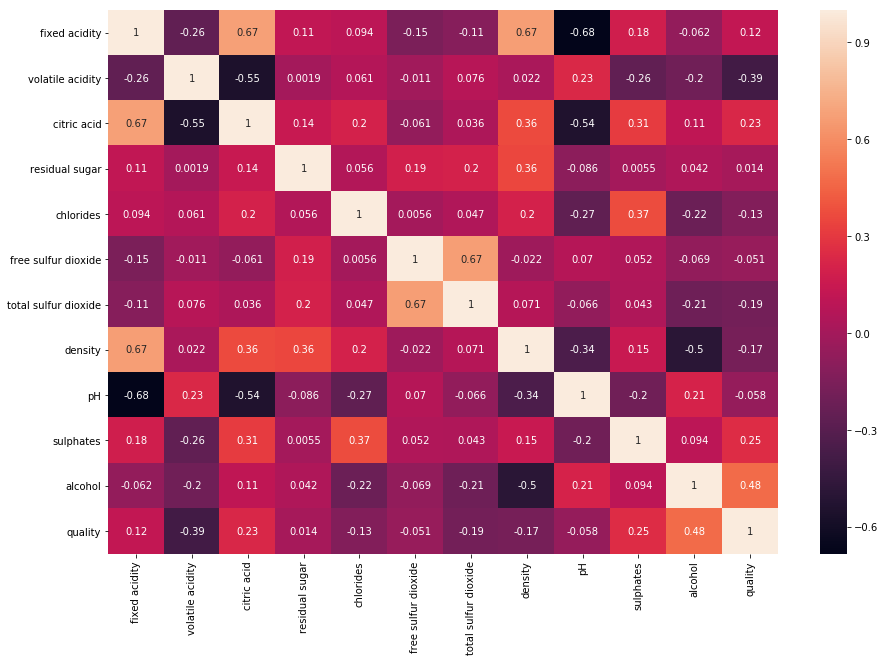

In [8]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True)

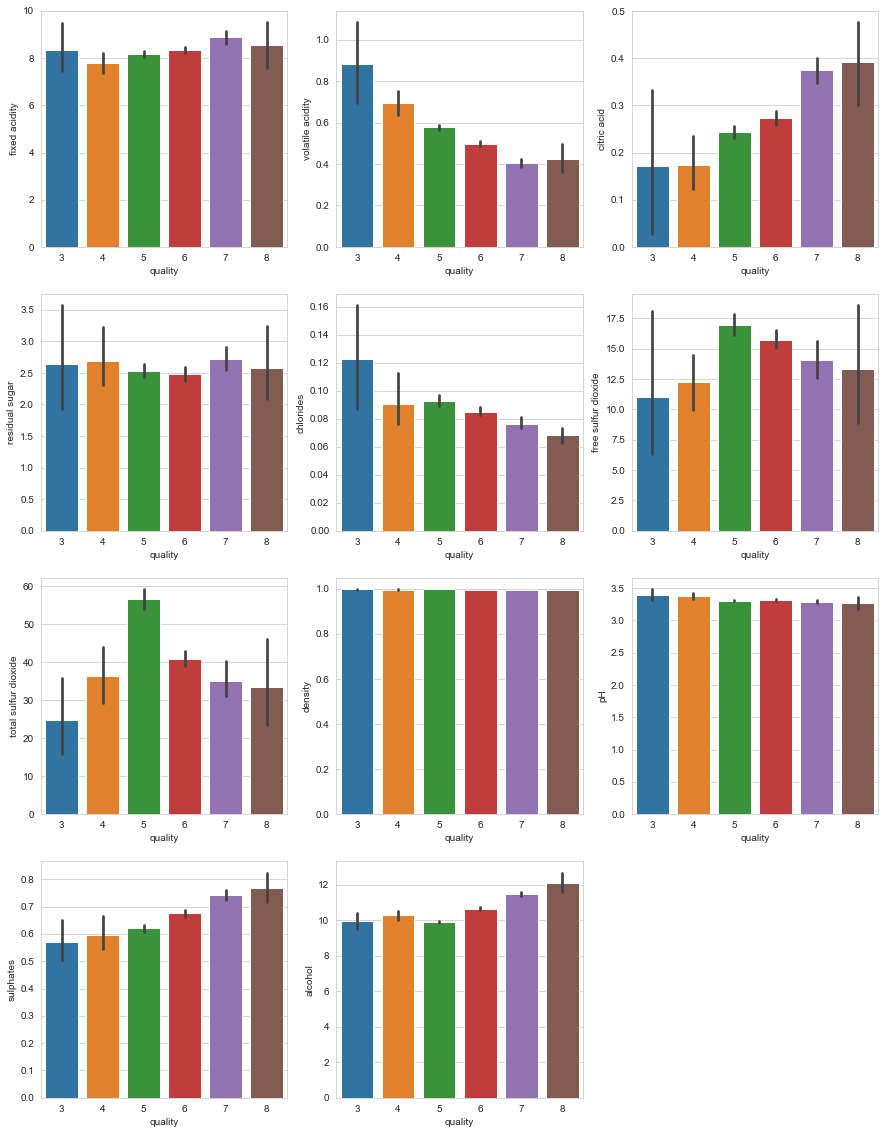

In [20]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,20))
columns = df.columns[:-1]
n = 1

for col in columns:
    plt.subplot(4,3,n)
    sns.barplot(data = df, x = 'quality', y = col)
    n+=1
plt.show() 

In [23]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [32]:
df['quality'] = df['quality'].apply(lambda x: 1 if x > 6.5 else 0)

In [40]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [41]:
X = df.drop('quality', axis = 'columns')
y = df['quality']

In [44]:
from sklearn.model_selection import train_test_split

X1, X2, y1, y2 = train_test_split(X, y, test_size = 0.3)

In [46]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10)
tree.fit(X1, y1)

display('Accuracy score for training:', tree.score(X1, y1),
       'Accuracy score for test:', tree.score(X2,y2))

'Accuracy score for training:'

0.9883824843610366

'Accuracy score for test:'

0.86875

In [47]:
ypred = tree.predict(X2)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y2, ypred)

0.86875

In [53]:
confusion_matrix(y2, ypred)

array([[385,  32],
       [ 31,  32]], dtype=int64)

In [58]:
print(classification_report(y2, ypred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       417
           1       0.50      0.51      0.50        63

   micro avg       0.87      0.87      0.87       480
   macro avg       0.71      0.72      0.71       480
weighted avg       0.87      0.87      0.87       480

